# First Neurons

In [23]:
import numpy as np
import tensorflow as tf

In [12]:
np.random.seed(101)
tf.set_random_seed(101)

In [13]:
rand_a = np.random.uniform(0,100,(5,5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [14]:
rand_b = np.random.uniform(0,100,(5,1))
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [15]:
a = tf.placeholder(tf.float32)

In [16]:
b = tf.placeholder(tf.float32)

In [17]:
add_op = a + b

In [18]:
mul_op = a * b

In [22]:
# with tf.Session() as sess:
#     add_result = sess.run(add_op, feed_dict={a:10,b:20})
#     print(add_result)

30.0


## Example Neural Network

In [56]:
n_features = 10 # 特征数量
n_dense_neurons = 3 # 隐藏层神经元数量？只有一个隐藏层？输出层神经元数量？没有隐藏层？

In [57]:
x = tf.placeholder(tf.float32,(None,n_features), name='x') # 不确定有多少组数据，但每组里有 n_features 个

In [58]:
b = tf.Variable(tf.zeros([n_dense_neurons]),name='b') # 每个神经元对应一个 bias
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]),name='W') 

** Operation Activation Function **

In [59]:
xW = tf.matmul(x,W)

In [60]:
z = tf.add(xW,b)

In [61]:
# tf.nn.relu() or tf.tanh()
a = tf.sigmoid(z)

** Varaible Initilizer! **

In [62]:
init = tf.global_variables_initializer()

In [63]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter('./graphs', sess.graph)
    
    sess.run(init)
    layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})
    
writer.close()

In [65]:
 print('layer_out', layer_out.shape)
print(layer_out)

layer_out (1, 3)
[[0.9431421  0.28452975 0.03026139]]


## Simple Regression Example

In [66]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [67]:
x_data

array([-0.2923428 ,  2.06647066,  2.98320971,  2.34241109,  4.32627486,
        4.1388581 ,  6.2333473 ,  8.06553523,  7.94254564,  9.60927027])

In [68]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [69]:
y_label

array([-0.22505257, -0.09101396,  2.48258188,  3.76835852,  3.35420339,
        4.06475726,  5.85517432,  9.21565475, 10.35310118,  9.1170609 ])

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

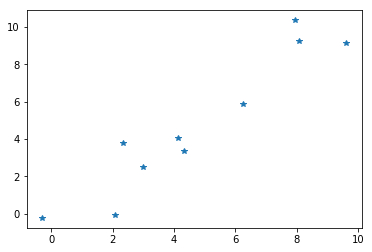

In [73]:
plt.plot(x_data, y_label, '*')

y = mx + b

In [74]:
np.random.rand(2)

array([0.58898627, 0.79200274])

In [75]:
m = tf.Variable(0.44)
b = tf.Variable(0.87)

In [77]:
error = 0

for x,y in zip(x_data, y_label):
    y_hat = m*x + b
    error += (y-y_hat)**2

In [78]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [79]:
init = tf.global_variables_initializer()

In [101]:
with tf.Session() as sess:
    sess.run(init)

    print('训练前：','m=',m.eval(),'b=', b.eval())

    print('开始训练:\n')
    training_steps = 100
    for i in range(training_steps):
        sess.run(train)
#         print('m=',m.eval(),'b=', b.eval())
    
    final_slope, final_intercept = sess.run([m,b])

训练前： m= 0.44 b= 0.87
开始训练:



In [102]:
print('final_slope=', final_slope, 'final_intercept=', final_intercept)

final_slope= 1.0004102 final_intercept= 0.2887852


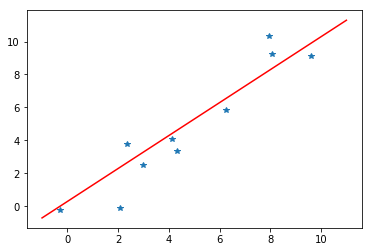

In [103]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept
plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data, y_label, '*')

## Simple regresstion example by Li Jian

In [113]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
m = 0.3
b = 0.6
y_label = x_data*m + b

m= 0.3 b= 0.6
y_label= [0.96543401 1.02931049 1.39939394 1.58426    1.56972918 2.60774939
 2.55620995 3.25193124 3.1857531  4.02539738]


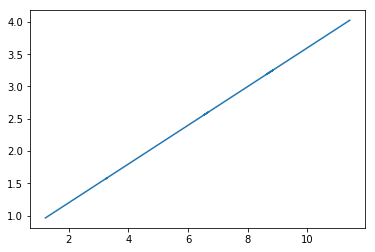

In [115]:
print('m=', m, 'b=',b)
print('y_label=',y_label)
plt.plot(x_data,y_label)

In [121]:
m_tensor = tf.Variable(m)
b_tensor = tf.Variable(b)

In [124]:
# 计算出所有的错误
error = 0

for x,y in zip(x_data, y_label):
    y_hat = m_tensor*x + b_tensor
    error += (y-y_hat)**2

error Tensor("add_83:0", shape=(), dtype=float32)


In [123]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [129]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    print('开始训练:\n')
    training_steps = 1
    for i in range(training_steps):
        sess.run(train)
    
    final_slope, final_intercept = sess.run([m_tensor,b_tensor])
    
    print('m_tensor',m_tensor.eval())

开始训练:

m_tensor 0.29999998
